This notebooks is for exploring text processing methods in Python.

In [5]:
import os

import IPython

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
### plotting ###
# set up plotting size
sns.set(rc={
    'figure.figsize':(18,8),
    'axes.titlesize':14,
})

### pandas ###
# make the tables more compact vertically, too
pd.options.display.max_rows = 20

In [7]:
# load the data

test = pd.read_csv('./data/drugsComTest_raw.csv')
train = pd.read_csv('./data/drugsComTrain_raw.csv')
merge = [train,test]
merged_data = pd.concat(merge,ignore_index=True)
bc_merged = merged_data[merged_data['condition'] == 'Birth Control']

In [8]:
bc_merged

,uniqueID,drugName,condition,review,rating,date,usefulCount
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1
14,98494,Nexplanon,Birth Control,"""Started Nexplanon 2 months ago because I have...",3,7-Aug-14,10
22,227020,Etonogestrel,Birth Control,"""Nexplanon does its job. I can have worry free...",9,11-Aug-14,11
...,...,...,...,...,...,...,...
215017,227273,Etonogestrel,Birth Control,"""So I got Nexplanon just under a year ago. I o...",9,5-Nov-13,3
215038,131040,Levonorgestrel,Birth Control,"""I first would like to thank all of you that p...",3,20-Jan-10,140
215056,33495,Microgestin Fe 1 / 20,Birth Control,"""I was on Microgestin for about 3 years. Over ...",6,1-Aug-14,15
215057,123432,Apri,Birth Control,"""I started taking Apri about 7 months ago. My ...",9,25-Aug-10,18


In [9]:
bc_merged.review

2         "I used to take another oral contraceptive, wh...
3         "This is my first time using any form of birth...
9         "I had been on the pill for many years. When m...
14        "Started Nexplanon 2 months ago because I have...
22        "Nexplanon does its job. I can have worry free...
                                ...                        
215017    "So I got Nexplanon just under a year ago. I o...
215038    "I first would like to thank all of you that p...
215056    "I was on Microgestin for about 3 years. Over ...
215057    "I started taking Apri about 7 months ago. My ...
215060    "I&#039;m married, 34 years old and I have no ...
Name: review, Length: 38436, dtype: object

## Remove HTML escaped characters
This removes the HTML escaped charaters like &#039; (HTML code for apostrophe)

In [19]:
from html import unescape

def clean_review(text):
    return unescape(text.strip(' "\'')).replace('\ufeff1', '')



In [20]:
bc_merged.review = bc_merged.review.apply(clean_review)
#bc_merged['clean_review'] = bc_merged.review.apply(clean_review)

We can see that now the apostrophe is good so the HTML should be clean now.

In [44]:
bc_merged.review

2         I used to take another oral contraceptive, whi...
3         This is my first time using any form of birth ...
9         I had been on the pill for many years. When my...
14        Started Nexplanon 2 months ago because I have ...
22        Nexplanon does its job. I can have worry free ...
                                ...                        
215017    So I got Nexplanon just under a year ago. I or...
215038    I first would like to thank all of you that po...
215056    I was on Microgestin for about 3 years. Over t...
215057    I started taking Apri about 7 months ago. My b...
215060    I'm married, 34 years old and I have no kids. ...
Name: review, Length: 38436, dtype: object

## Some text analysis

Cool wordcloud visual!

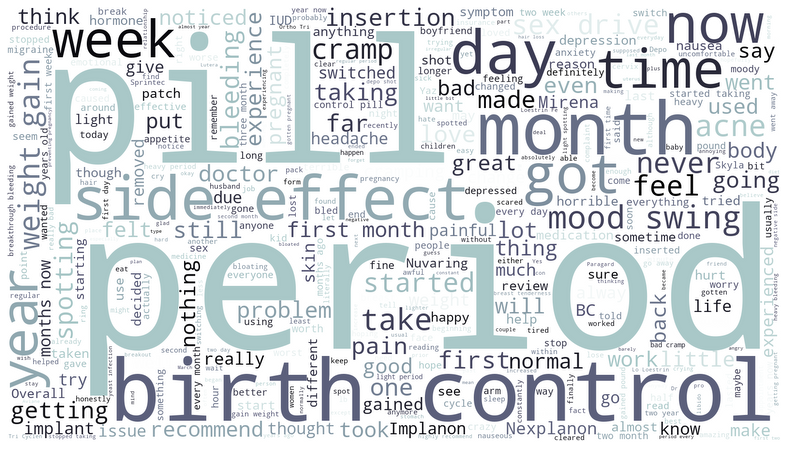

In [47]:
from wordcloud import WordCloud

wordcloud = WordCloud(
    width=1600,
    height=900,
    random_state=2019,
    background_color='white',
    max_words=400,
    colormap='bone'
)

wordcloud.generate('\n'.join(bc_merged.review))
plt.imshow(wordcloud, interpolation='lanczos')
plt.axis('off')
plt.show()

Thi is a nice way to display the reviews!

In [49]:
markdown = '### A peek at some reviews\n'
for idx, row in bc_merged.sample(10).iterrows():
    markdown += f'\n\nReview {row.uniqueID}\n\n> '
    markdown += '\n> '.join(row.review.splitlines())
    
IPython.display.Markdown(markdown)

### A peek at some reviews


Review 60326

> I love Nuvaring. It's easy to insert and I've only had it fall out like once or twice since I've been using it. I started it three months ago, and haven't really noticed any side effects. Maybe a little bit of moodiness, but it's better than being pregnant. My partner can feel it, but he doesn't complain. I will NEVER go back to using the pill again!

Review 16167

> Honestly I never write reviews but I have been on this birth control for 3 months and I just requested to switch.My first period was pretty bad and my second was so light I was worried it didn't even count as a period. My inconsistent periods are not what bugged me though. My mood swings have been insane and everyone pointed it out to me after I have been saying I feel depressed spent a lot of time sleeping and in my room. I'm usually a positive person with a positive outlook on situations but I have felt myself become more negative and miserable. I have been on other birth controls before and have had no problems. I fully believe different birth controls affect people different ways so it may work for you! This has just been my expierience

Review 38651

> I got the liletta placed five days ago and the insertion was way more painful than I ever remembered the Mirena to be. It was so uncomfortable that I was on the verge of telling them to just forget it. Anyway I went through with it and sucked it up. I've been cramping, bleeding and passing blood clots since it was inserted. The cramps are not something that I can withstand for a long period of time so I've made ibuprofen and my heating pad my best friend. Today I went to the bathroom and I passed blood clots and I waited because I felt like I was passing another huge one...however this felt slightly different from the others, and what do you know, the liletta made its way out:( I'm very disappointed!

Review 106810

> I have been on implanon for almost three years now and will probably get it again when the time is due. When I first started my periods became spotty and then went away all together. It's fantastic. No mood swings, so weight gain, and no acne either. I was on the depo shot before this and that was complete opposite. I've had no issues with implanon and would definitely recommend it.

Review 148726

> I first started birth control around 2004, age 22.  I tried the Pill, and all it did was make me spot and have periods that lasted for weeks- so I stopped using it. Then I tried the NuvaRing- that worked for about 3 months then the spotting started again.  I then had no birth control until August of 2010.  I wasn't sexually active- so didn't worry about it.  I had been told when I first tried to get the IUD in 2004 that you can't have one unless you've had at least one child, so I gave up.  It was either between Mirena or Paragard-since I have heavy menstrual cycles and cramps and PMS, I chose the Mirena. I had the first one in August of 2010 and my second one in September of 2015.  I have had no bad experience with it- my periods are light

Review 143746

> 30, no children, 105lbs previously on Lo Loestrin 1+ yr prior to Nexplanon insertion June 2016. No periods on lo lo and none with implant. Implantation quick and easy, not a big deal with Tenderness at implantation site for 4-7 days. Ok for the first 2 mos and I have no other side effects except terrible acne. Acne across cheeks and jawline and it doesn't go away. Deep, painful pimples with obvious whiteheads. While I've never had perfectly clear skin, I've also never had acne like this. Doctor said hormonal acne unlikely to go away but could see dermatologist if I desire. Why waste money at derm when I can tie it directly to this? Getting married in 8 mos and need to clean it up now and try something else Otherwise worked fine

Review 188678

> So I am giving the paraguard a 5. I had my first child almost 3 yrs ago. I got the IUD put in 3 months after delivery. It did not hurt that bad to insert just a lot of pressure and mild cramping after. The reason I chose this IUD was because I had tried several b.c pills in past and always had issues with hormones. Overall it served its purpose but I did have side effects I just felt tired all the time, anxiety, bloated and some more severe period symptoms in the beginning, I also started having a lot of chronic back and neck pain and just felt pretty shitty all the time, not healthy. I decided to take it out this past week after having it almost 3 yr. I already feel better more energy less bloat and it's crazy but my back pain Is gone!!

Review 33228

> I've been taking this pill for 2.5 years and am completely satisfied. The first month taking it I had mood swings and nausea, but this is normal! It's the side effects that I feel most birth controls come with. 
> I rate this a 9/10 because this pill has kept me from pregnancy and cleared my breakouts on my back and chest, but not my face.
> I can hide my chest and back, but not so much my face!! 
> Great contraceptive. I would recommend this to a friend or family member. The "periods" are SUPER light, if anything you probably won't spot during the sugar pill week. 
> There are many negative feedback about this pill, and I wanted to share my good experience with this birth control. Give it a month or so to kick in and it'll be worth it!

Review 85821

> I was on Tri-Nessa for almost 6 months. It did its job on birth control. My acne was almost gone with this medication, and less hormonal during my time of the month. Worked great for me. No abnormal bleeding with this one.
> 
> The bad effect that happened to me: During the 6 month period, I had gained 25 pounds. I went from 110 to 135lbs. I wasn't like a twig, I was fit. But then after this, I got tired and just ate all the time. I also would get really nauseous from the first 2 weeks. Works well, but the side effects were bad.
> 
> Everybody is different, but this is what happened to me.

Review 71462

> The only positive thing about this pill is I didn't get pregnant. For the 6 months I've been on it I've had 2 periods a month and cramped horribly every time. I workout at a minimum of 7 times a week, running miles, weight training etc. and I gained weight on this pill, quickly. I just stopped taking it, it's not worth all the negative side effects.